### 機械学習　演習

#### ボストン住宅家賃予測
#### 単純な線形回帰モデル


In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import re
import requests
from pprint import pprint
import lightgbm

In [3]:
print(np.__version__)

1.19.5


In [4]:
boston = load_boston()

In [5]:
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [6]:
# ディクショナリ型なので、keys()でデータ構成を確認できる。
print(boston.keys())
print(boston["feature_names"])

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
import time
import json
def translate(title):
  descr = boston["DESCR"]
  descrsp = descr.splitlines()
  for line in descrsp:
    print(line)
    #         - CRIM     per capita crime rate by town
    searched = re.search(f"^(        - )({title})(.*)$", line)
    if searched is None:
      print("no searched")
      pass
    else:
      # print("●●●●●●●●●●●●●●●●●●●●●●")
      print("searched", searched.group(3))
      word = searched.group(3)
      url = f"https://script.google.com/macros/s/AKfycbzZtvOvf14TaMdRIYzocRcf3mktzGgXvlFvyczo/exec?text={word}&source=en&target=ja"
      res = requests.get(url)
      time.sleep(0.5)
      if res.status_code == 200:
        print(title + ": ", res.json()["text"])
      else:
        print("trans error: ", word)


for title in boston["feature_names"]:
  translate(title)



.. _boston_dataset:
no searched

no searched
Boston house prices dataset
no searched
---------------------------
no searched

no searched
**Data Set Characteristics:**  
no searched

no searched
    :Number of Instances: 506 
no searched

no searched
    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.
no searched

no searched
    :Attribute Information (in order):
no searched
        - CRIM     per capita crime rate by town
searched      per capita crime rate by town
CRIM:       町別の一人当たりの犯罪率
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
no searched
        - INDUS    proportion of non-retail business acres per town
no searched
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
no searched
        - NOX      nitric oxides concentration (parts per 10 million)
no searched
        - RM       average number of rooms per dwelling
no searched
        - AGE  

In [8]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
print(boston["feature_names"])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [10]:
boston_data = boston["data"]

In [11]:
columns = boston["feature_names"]
# columns = np.append(columns, "MEDV") MEDV列はtargetの方にある。
df = pd.DataFrame(boston_data, columns=columns)
print(columns)
df

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [13]:
df.shape

(506, 13)

In [14]:
# 目的変数をDataFrameへ追加
df['PRICE'] = np.array(boston.target)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [15]:
len(df['RM'].values)

506

In [16]:
explain = df[['RM']].values
explain

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [17]:
target = df[['PRICE']].values
target

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [18]:
model = LinearRegression()
model.fit(explain, target)
model.predict([[7]])

array([[29.04414209]])

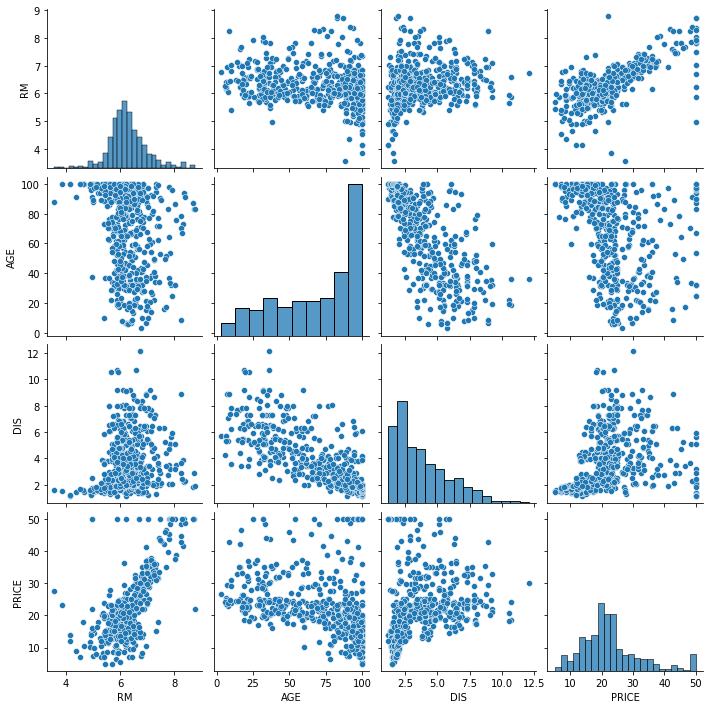

In [19]:
# 散布図行列でざっくり相関を確認
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df[["RM", "AGE", "DIS", "PRICE"]]) # seaborn.pariplotで散布図行列の描画

In [20]:
# 説明変数を追加
explain = df[['RM','DIS']].values
model = LinearRegression()
model.fit(explain, target)
model.predict([[7, 6]])

array([[29.90692384]])

In [21]:
# さらに追加
explain = df[['RM','DIS', 'ZN']].values
model = LinearRegression()
model.fit(explain, target)
model.predict([[7, 6, 40]])

array([[30.4200297]])

(array([372.,  12.,  48.,  16.,  13.,   6.,   4.,   6.,  19.,  10.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

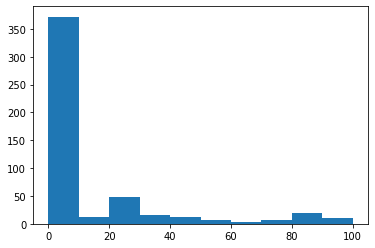

In [22]:
plt.hist(df['ZN'])

In [23]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [24]:
# 説明変数と目的変数を改めて準備
explain = df[['RM','DIS', 'ZN']].values
target = df[['PRICE']].values

In [25]:
# 単純に学習と予測
model = LinearRegression()
model.fit(explain, target)
print("score: ", model.score(explain, target)) # 学習データでのスコアでも0.5しかいかない。
model.predict([[7, 6, 40]])


score:  0.50658594274368


array([[30.4200297]])

In [27]:
# 分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(explain, target, random_state=0, train_size=0.7)
print(len(X_train))
print(len(X_test))

model = LinearRegression()
model.fit(X_train, y_train)
print("score: ", model.score(X_test, y_test)) # 検証データだとさらに低い。0.44
model.predict([[7, 6, 40]])

354
152
score:  0.4444787511285049


array([[30.66816442]])

In [28]:
# このセルの、「cross_val_score」 は、スコアの種類が一度にひとつしか計算できないので使わないほうがよい。
from sklearn.model_selection import cross_val_score
explain = df[['RM','DIS', 'ZN']].values
target = df[['PRICE']].values
model = LinearRegression()
scores = cross_val_score(model, explain, target)
# 各分割におけるスコア
print('Cross-Validation scores: {}'.format(scores))
# スコアの平均値
import numpy as np
print('Average score: {}'.format(np.mean(scores)))

Cross-Validation scores: [ 0.69636231  0.61903785  0.50149366 -0.19361097 -1.74396334]
Average score: -0.024136097681940603


In [29]:
# 交差検証
# よくネットで見かける cross_val_scoreは、
# スコアの種類を同時にいくつも計算してくれなくて使い勝手が悪いとのこと。
# https://www.haya-programming.com/entry/2018/03/31/184557
# https://blog.amedama.jp/entry/sklearn-cv-custom-metric
# cross_validate を使用する
from sklearn.model_selection import cross_validate, StratifiedKFold, KFold
# from sklearn.model_selection import cross_val_score

# このように複数の種類を指定できる、が、今回は回帰なので
# これらの指標は関係なかった
# scoring = {"p": "precision_macro", "r": "recall_macro", "f": "f1_macro"}
# scoring = ['accuracy','precision','recall','f1']
# ここに適切な指標を指定しないとcontinuous is not supported と分かりづらいエラーが出る。
scoring = [
  'neg_mean_squared_error',
  'neg_median_absolute_error']
# くわしい説明はここ
# https://qiita.com/Mukomiz/items/f5c562ff8b538c1502d7

explain = df[['RM','DIS', 'ZN']].values
target = df[['PRICE']].values

# ネット上のStratified KfoldやGaussianNBを使用しているものを参考にしたため
# 動作するまで手こずった。
# StratifiedKfolde:  分類問題でないと使用できない
# GaussianNB:  ValueErrorが出て動かなかった
# ndarrayがまずいのかと思いtolist()に変えたりしたが、これは結局どちらでも動作する。

model = LinearRegression()
from sklearn.naive_bayes import GaussianNB

kf = KFold(n_splits = 5)
# print(target.shape)
# print(type(explain))
import sklearn
scores = cross_validate(model, explain, target, cv=kf, scoring=scoring)

# これは評価方法の種類を列挙する
# pprint(sorted(sklearn.metrics.SCORERS.keys()))

pprint(scores)
print("MSE: ", scores["test_neg_mean_squared_error"].mean())
print("MAE: ", scores["test_neg_median_absolute_error"].mean())

{'fit_time': array([0.0007236 , 0.0005753 , 0.00057673, 0.00052524, 0.00055075]),
 'score_time': array([0.00065708, 0.00067234, 0.00061846, 0.00054526, 0.00053501]),
 'test_neg_mean_squared_error': array([ -10.48618691,  -34.68155751,  -39.92397823, -104.6938281 ,
        -72.95736673]),
 'test_neg_median_absolute_error': array([-2.18699661, -2.62695139, -4.24303442, -2.67800476, -6.78113431])}
MSE:  -52.5485834971779
MAE:  -3.7032242990755533


### ここからは、ボストン住宅データを線形回帰以外のアルゴリズムで実験的に学習する。

In [30]:
# ElasticNet

# サンプルをもとに改変
# https://blog.amedama.jp/entry/sklearn-cv-custom-metric

import math
from sklearn import datasets
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer


def rmse_score(y_true, y_pred):
    """RMSE (Root Mean Square Error: 平均二乗誤差平方根) を計算する関数"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return rmse


def main():
    # Boston データセットを使った回帰問題
    # dataset = datasets.load_boston()
    # X, y = dataset.data, dataset.target

    # ElasticNet 回帰
    reg = ElasticNet(random_state=10)

    kf = KFold(n_splits=5, shuffle=True, random_state=10)

    score_funcs = {
        'rmse': make_scorer(rmse_score),
        'mae': 'neg_median_absolute_error'
    }

    # 出力はこのように平均して出す。
    scores = cross_validate(reg, explain, target, cv=kf, scoring=score_funcs)
    mean_rmse = scores['test_rmse'].mean()
    print('RMSE:', mean_rmse)
    mean_mae = scores['test_mae'].mean()
    print('MAE:', mean_mae)

main()

RMSE: 7.335149087760584
MAE: -3.5821757778028953


In [31]:
# LightGBM

param = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'max_depth': -1,
        'learning_rate': 0.01,        
    }
fit_params = {
    'early_stopping_rounds': 10
}

# これがClassifierになっているとよく分からないエラーが出て気づきづらいので注意。
model = lightgbm.LGBMRegressor(**param)
lgbm_explain = lightgbm.Dataset(explain.tolist())
lgbm_target = lightgbm.Dataset(target.tolist())


In [32]:
# これは拾い物
# 誤差関数を定義しているのでそれをそのまま使用。
# https://nigimitama.hatenablog.jp/entry/2018/09/30/214506
# RMSE 23、MER 0.9 という結果
# さっきの線形回帰よりはよい？
# しかしよく分からない。

# データの分割
#X = df.drop(['MEDV'],axis=1)
#y = df['MEDV']
X = df.drop(['PRICE'], axis=1)
y = df['PRICE']

# trainデータ, testデータへの分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Cross Validationによる予測精度の評価
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# 誤差関数の定義
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def median_absolute_error_rate(y_true, y_pred):
    return np.median(np.absolute(y_true - y_pred) / y_true)

# Cross Validationで使う誤差関数のセット
scoring = {"r2": "r2",
           "RMSE":make_scorer(root_mean_squared_error),
           "MER":make_scorer(median_absolute_error_rate)}

model = lightgbm.LGBMRegressor(**param)

# cross_validate
scores = cross_validate(model, X_train, y_train, cv = 10, scoring = scoring, return_train_score=False)
for key,value in scores.items():
    print("{}:{:.3g}+/-{:.3g}".format(key, value.mean(), value.std()))

# 結果を格納
cv_accuracy_EN = pd.DataFrame(scores)[['test_r2','test_RMSE','test_MER']].mean()



fit_time:0.00752+/-0.00388
score_time:0.00386+/-0.000357
test_r2:-5.97+/-1.47
test_RMSE:23.5+/-1.35
test_MER:0.953+/-0.00223


In [33]:
# 線形回帰のときにやった指定方法で実施してみる。

# データの分割
#X = df.drop(['MEDV'],axis=1)
#y = df['MEDV']
X = df.drop(['PRICE'], axis=1)
y = df['PRICE']

# trainデータ, testデータへの分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Cross Validationによる予測精度の評価
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# # 誤差関数の定義
# def root_mean_squared_error(y_true, y_pred):
#     return np.sqrt(mean_squared_error(y_true, y_pred))

# def median_absolute_error_rate(y_true, y_pred):
#     return np.median(np.absolute(y_true - y_pred) / y_true)

# # Cross Validationで使う誤差関数のセット
# scoring = {"r2": "r2",
#            "RMSE":make_scorer(root_mean_squared_error),
#            "MER":make_scorer(median_absolute_error_rate)}

scoring = [
  "r2",
  'neg_mean_squared_error',
  'neg_median_absolute_error']

model = lightgbm.LGBMRegressor(**param)

# cross_validate
scores = cross_validate(model, X_train, y_train, cv = 10, scoring = scoring, return_train_score=False)
for key,value in scores.items():
    print("{}:{:.3g}+/-{:.3g}".format(key, value.mean(), value.std()))

# 結果を格納
cv_accuracy_EN = pd.DataFrame(scores)[['test_r2','test_neg_mean_squared_error','test_neg_median_absolute_error']].mean()

# 結果が全然違う。。。。と思ったらルートを取っていないためと思われる。
print(cv_accuracy_EN['test_neg_mean_squared_error'])
np.sqrt(-1 * cv_accuracy_EN['test_neg_mean_squared_error'])
# scikitのcross_validateの用意しているのはsquared(二乗) errorなので、
# sqrtはされていない。

np.sqrt(-1 * cv_accuracy_EN['test_neg_median_absolute_error'])


fit_time:0.00623+/-0.000344
score_time:0.00357+/-0.000285
test_r2:-5.97+/-1.47
test_neg_mean_squared_error:-553+/-63.9
test_neg_median_absolute_error:-20.2+/-0.944
-552.6385835365853


4.491102314577124

In [34]:
cross_validate(model, X_train, y_train, cv = 10, scoring = scoring, return_train_score=False)

{'fit_time': array([0.01422381, 0.00601292, 0.00596333, 0.0059545 , 0.00597525,
        0.00600672, 0.00579023, 0.00575161, 0.00584316, 0.00568867]),
 'score_time': array([0.00367689, 0.00331783, 0.00328636, 0.00385308, 0.00319362,
        0.00321674, 0.00315976, 0.00319171, 0.00311947, 0.00311565]),
 'test_neg_mean_squared_error': array([-504.97463415, -446.83780488, -593.78804878, -494.68609756,
        -554.57425   , -573.93125   , -588.68375   , -693.401     ,
        -550.9525    , -524.5565    ]),
 'test_neg_median_absolute_error': array([-19.6 , -19.5 , -21.  , -20.5 , -19.9 , -20.4 , -21.  , -20.45,
        -17.95, -21.4 ]),
 'test_r2': array([-4.77640032, -7.31563689, -5.86937511, -8.12736233, -5.90501176,
        -5.16361623, -6.52189481, -4.49242545, -3.49135777, -8.07843869])}

In [35]:
# 参考
# https://qiita.com/kibinag0/items/1a29db61fcb8c527d952


# scikit-learn を用いた交差検証（Cross-validation）と
# ハイパーパラメータのチューニング（grid search）
# https://qiita.com/tomov3/items/039d4271ed30490edf7b



### 単純な線形回帰モデル

$$
a = \frac{cov(x, y)}{s_x} \\
　\\
b = \bar{y} - a・\bar{x} \\
　\\
$$
y = ax + b  となる線形回帰
　



.



In [36]:
# 単純な線形回帰の実装

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def linear(n_size):
  # 真のデータを生成する関数
  def base_func(x):
      return 1.5 * x + 6

  # 学習データ生成
  def fractuate(y_base):
      return y_base + np.random.normal(scale=0.3, size=y_base.shape)

  x_train = np.linspace(0, 1, n_size)
  y_base = base_func(x_train)
  y_train = fractuate(y_base)

  #学習
  def train(x, y):
      cov = np.cov(x, y, ddof=0)
      a = cov[0, 1] / cov[0, 0]
      b = np.mean(y) - a * np.mean(x)
      return cov, a, b

  cov, a, b = train(x_train, y_train)

  #予測
  #xs_new = np.linspace(0, 1, n_sample)
  ys_pred = a * x_train + b

  #結果の描画
  plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
  plt.plot(x_train, y_base, label="$1.5 x + 6$")
  plt.plot(x_train, ys_pred, label=f"prediction (a={a:.4}, b={b:.4}), dat_size{n_size}")
  plt.legend()
  plt.show()

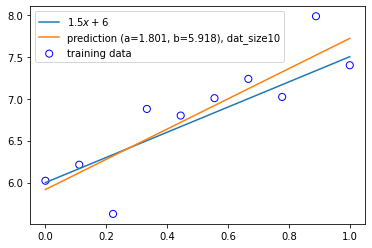

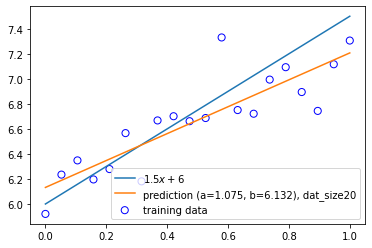

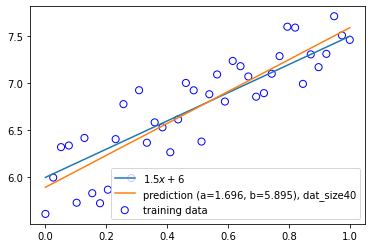

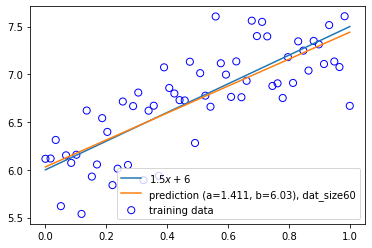

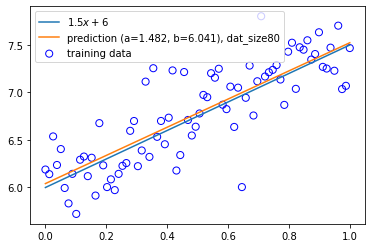

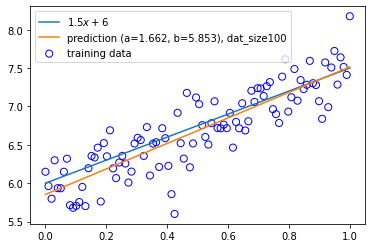

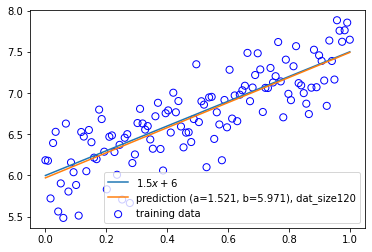

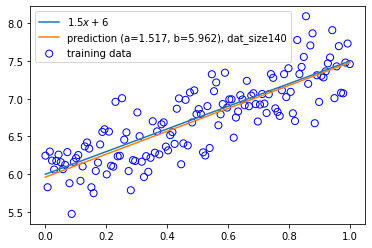

In [37]:
# データが増えるにつれて結果は安定する。（真の値に近い線になりやすい）
n_size = 10
linear(n_size)
n_size = 20
linear(n_size)
n_size = 40
linear(n_size)
n_size = 60
linear(n_size)
n_size = 80
linear(n_size)
n_size = 100
linear(n_size)
n_size = 120
linear(n_size)
n_size = 140
linear(n_size)